## 4-2. 신경망의 구성


###  1. 밀도 레이어(Dense Layer)
#### 밀도 레이어(Dense Layer)의 구성
- 완전 연결층(Fully Connected Layer): 레이어의 입력이 현재 레이어의 모든 뉴런과 완전히 연결
- 구성 및 연산
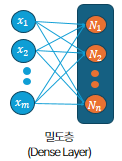

> 입력(x, m): 이전 레이어 벡터
>
> 뉴런의 수(n): 레이어 출력 수
> 파라미터 구성
>    가중치 행렬(W, n×m): 레이어 출력 수
> 
>    편향 벡터(b,n): 레이어 출력 수
> 
>    활성화 함수: f(x)
> 
> 연산: $𝐲=𝑓(𝑊𝐱+𝐛)$
>
> $\mathbf{x} = \begin{pmatrix} x_1 \\ x_2 \\ \vdots \\ x_m \end{pmatrix}$
>
> $\mathbf{W} = \begin{pmatrix} w_{11} & w_{12} & \cdots & w_{1m} \\ w_{21} & w_{22} & \cdots & w_{2m} \\ \vdots & \vdots & \ddots & \vdots \\ w_{n1} & w_{n2} & \cdots & w_{nm} \end{pmatrix}$ $b = \begin{pmatrix} b_1 \\ b_2 \\ \vdots \\ b_n \end{pmatrix}$

#### 밀도 레이어의 특징
- 특징 표현 능력: 충분한 수의 뉴런 층이 있으면 복잡한 특징 표현 가능
- 파라미터 수: m(입력 수) × n(뉴런 수) + n
- 활용
> 다층 퍼셉트론의 핵심 구성 요소
> 특징 추출 후 최종 출력 네트워크 구성

### 2. 신경망의 구성

#### 밀도 레이어(Dense Layer)의 한계

- 공간적, 시각적 정보 손실
- 특성이 늘어날수록 파라미터 폭증
> 특성의 성격에 맞게 네트워크 구성 효율화
> 신경망의 심층화: 계층적 구조를 통한 특성 추상화

### 3. 임베딩 레이어(Embedding Layer)

#### 범주형 데이터를 연속적인 실수 벡터 공간으로 매핑
- 구성 및 연산
- 입력(m): 범주형 데이터 에서 범 주의 정수 인덱스 (Ex: 사과→1, 배 →2, …, Unknown →0)
- 임베딩 크기(n): 범주를 표현할 벡터의 크기
- 범주 수(k): 범주형 데이터에서 범주의 개수
- 출력: m×n

- 파라미터 구성
> 임베 딩 테이블(k × n): 각 범주값의 의미를 나타내는 벡터의 집합
> 
> 연산: 입력이 나타내는 위치의 벡터 반환

#### 임베딩 레이어의 특징

- 의미적 관계 학습: 역전파에 의해 데이터에 나타난 범주의 특징 기록
> 추상적인 개념이나 관계를 수치적으로 표현
- 희소성 문제 해결
> 높은 가짓수 를 가진 범주형 변수의 가변수 처리에 의한 고차원 희소벡터의 비효율 해결
> 
> 일반화 능력 향상 및 과적합 방지

- 활용
> 단어, 사용자 ID, 상품 등 비교적 높은 가짓수를 가진 범주형 데이터 표현
- 문제점
> 새로 등장한 범주나 등장 빈도가 적은 범주에 대해서는 낮은 성능
> 
> 최적의 임베딩 크기 결정 필요

### 4. 합성곱 레이어(Convolution Layer)
#### 지역적(위치 기반) 패턴의 효과적 추출 및 표현
- 필터를 입력 데이터 전체에 걸쳐 이동시키며 합성곱으로 영역의 특징을 추출하는 연산
- 구성 및 연산
> 채널(channel): 위치의 특 징을 공유하는 데이터 단위
> 
> $C_{in}$: 입력 채널 수  $C_{out}$: 출력 채널 수
>
> 입력($W \times C_{in}, W \times H \times C_{in}$, ...): 텐서 의 인덱스가 위치와 채널을 나타내는 데이터
>
> 커널/필터($M, M \times N$, …): 지역적 패턴을 나타 내는 가중치 텐서
>
> 패딩(Padding, P): 가장 자리에 0 을 추가해 출력 크기 조절
> 
> 스트라이드(S): 필터가 한 번에 이동하는 거리
>
> 편향(b): 합성곱 연산의 편향값으로, 출력 채널수만큼 있음
> 
> 출력 크기: $O = \left\lfloor \frac{I - K + 2P}{S} \right\rfloor + 1$


- 합성곱

> 입력 크기: 5×5, 커널 크기: 3×3, 패딩: 1, 스트라이드: 2, 편향: b=1
>
> 파라미터의 구성: 커널 행렬($K, M \times N$): $3 \times 3 = 9$, 편향: 1

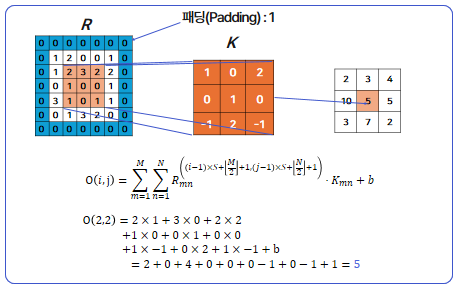

- 다채널 합성곱

> 채널(channel): $C_{in}$: 3, $C_{out}$: 4
>
> 입력 크기: 5×5x3, 커널 크기: 3×3, 패딩: 1, 스트라이드: 2, 편향: 3x4, 출력: 5x5x4
>
> 파라미터의 구성: 커널 행렬($K, M \times N \times C_{in} \times C_{out}$): $3 \times 3 \times 3 \times 4= 108$, 편향($C_{out}$): 4

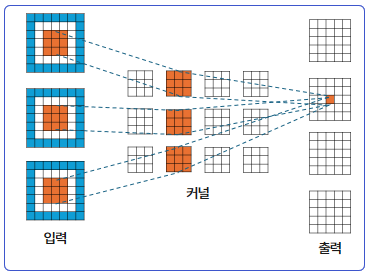

### 5. 순환 신경망(Recurrent Neural Network)
#### 시퀀스 데이터를 효율적으로 처리하기 위한, 순환 구조의 신경망
- 순환 구조 vs 비순환 구조

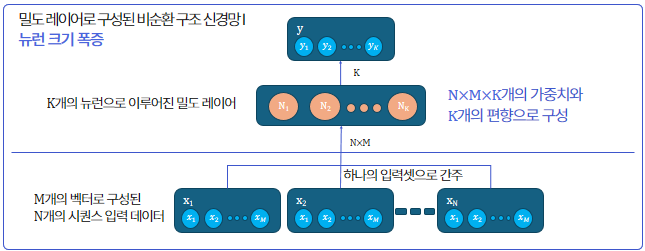

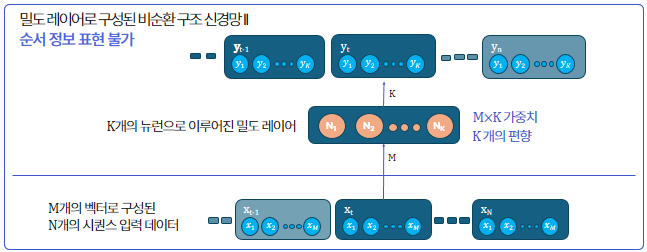

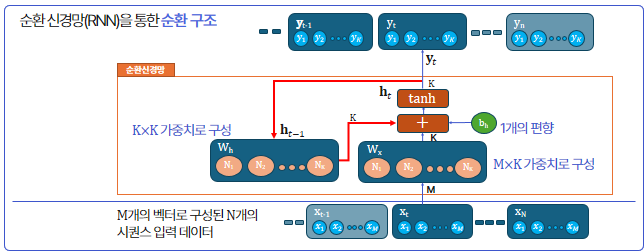

- 연산: $𝐲_𝑡=𝐡_𝑡=tanh(𝑊_{𝐱𝐱}𝑡+𝑊_{𝐡}𝐡_{𝑡−1}+𝑏_h)$

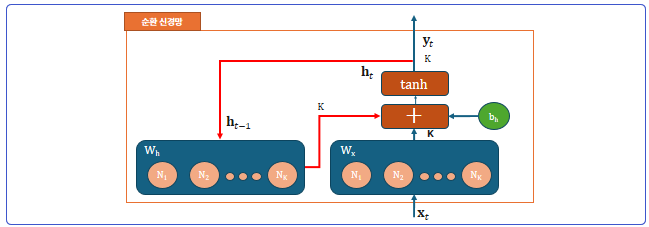

#### RNN 의 문제점
- 기울기 소실(Vanishing Gradient): 역전파 시 작은 값이 존재할 경우 기울기 소실

- 기울기 폭증(Vanishing Exploding): 역전파 시 큰 값이 존재할 경우 기울기 폭증 및 학습 불안정

> $\Rightarrow$ LSTM(Long Short-Term Memory), GRU(Gated Recurrent Unit)와 같은 게이트 구조 도입

#### LSTM(Long Short-Term Memory): 게이트(Gate)를 통해 중요한 정보는 기억하고 불필요한 정보는 버림

- 입력 게이트(Input Gate): 기억 영역에 반영할 정도 조절
- 망각 게이트(Forget Gate): 이전 정보 기억 여부 조절
- 출력 게이트(Output Gate): 은닉 상태에 얼마나 반영할지 조절
- 순환 신경망(Recurrent Neural Network)
- 셀 상태(Cell Status): 장기 메모리 역할

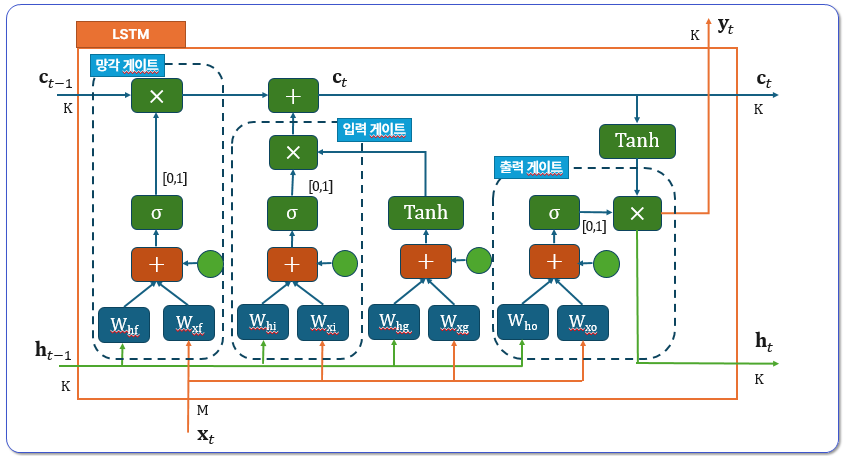

#### GRU(Gated Recurrent Unit): LSTM 보다 간단한 구조로, 계산량을 줄임
- 갱신 게이트(Update Gate): 새 정보 반영과 이전 상태 유지 조절
- 초기화 게이트(Reset Gate): 이전 상태의 유지와 갱신 정도 조절

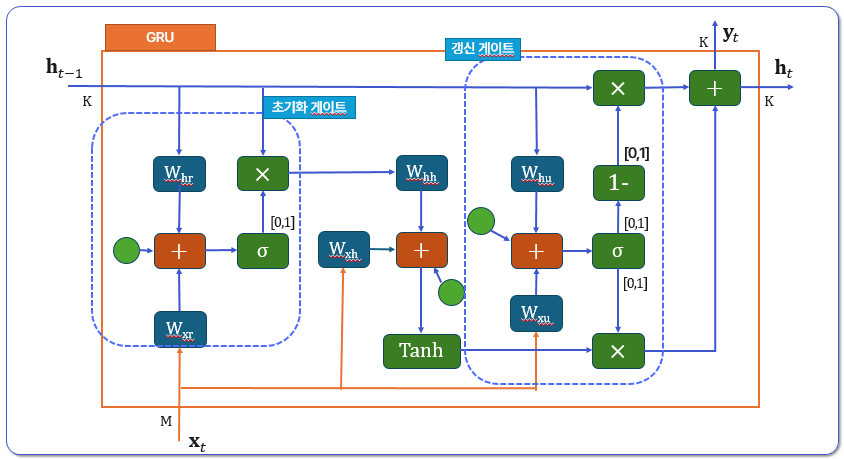

#### 시퀀스 모델링 유형
- 시퀀스 축으로 펼친(Unrolled) 구조도

| 활성화 함수 | N:1 구조<br/>(Many-to-One) | 1:N 구조<br/>(One-to-Many) |
| --- | --- | --- |
| 구조 |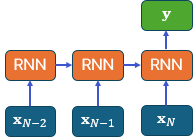|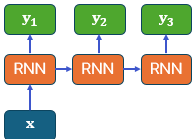|
| 사용 사례 | 감성 분석 | 이미지 캡셔닝 |


| 활성화 함수 | 1:1 대응 구조<br/>(One-per-One) | M:N 구조<br/>(Many-to-Many) |
| --- | --- | --- |
| 구조 |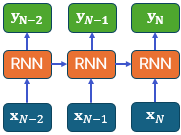|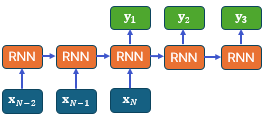|
| 사용 사례 | 비디오 캡셔닝 | 기계 번역 |



### 6. 드롭 아웃(Drop-out)
#### 학습 중 무작위로 일부 뉴런을 제외(Drop)하여 과적합에 대응

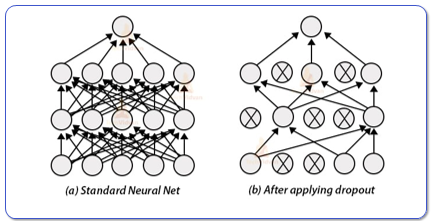

- 일부 뉴런에 지나치게 의존하지 않게 학습
- 앙상블 효과: 서로 다른 서브 네트워크를 무작위로 학습하는 효과
- 드롭 아웃 비율(Drop-Out Rate): 뉴런이 제외될 확률


### 7. 풀링(Pooling)
#### 영역별 대표값(최대값, 평균,...)을 추출하여 압축
- 공간 차원 축소: 연산량 감소, 메모리 절약
- 강인함(Robustness) 확보
- 계층적 표현 강화
- 정보 손실에 유의


- 구성 및 연산
> 윈도우 사이즈(W): 단위 영역의 크기, 전역 풀링(Global Pooling)일 경우 채널 전체가 단위 영역이 됨
> 
> 스트라이드(Stride, S): 윈도우 이동 간격
> 
> 패딩(Padding, P): 가장자리에 0을 추가해 출력 크기 조절
> 
> 출력 크기: $O = \lfloor \frac{I - K + 2P}{S} \rfloor + 1$



- 구성 및 연산
> 최대 풀링(Max Pooling)
> 
> $output(i, j) = \max_{(m,n) \in window} x(i + m, j + n)$
> 
> 평균 풀링(Average Pooling)
>
> $output(i, j) = \frac{1}{|window|} \sum_{(m,n) \in window} x(i + m, j + n)$

#### 정리

- 핵심 레이어

| 구분 | 개념 | 주요 활용 분야 |
| --- | --- | --- |
| 밀도 레이어 | 모든 뉴런이 레이어의 입력과 모두 연결된 형태 | 다층 퍼셉트론<br/>신경망 상층에서 정보 종합 |
| 임베딩 레이어 | 범주형 데이터(특히 높은 가짓수)를 연속적인 벡터로 매핑 | 자연어 처리, 추천 시스템, … |
| 합성곱 레이어 | 필터/커널을 통해 지역(위치)의 구조 표현 | 이미지 처리, 영상 분석, 음성 인식, 신호 분석 |
| 순환 신경망 | 시퀀스(순서 기반) 데이터의 순서상 관계 표현 | 자연어 처리, 시계열 예측 |


- 보조 레이어

| 구분 | 역할 |
| --- | --- |
| 드롭 아웃 | 학습 중 일부 뉴런을 드롭(Drop)시켜 과적합 방지 |
| 풀링 | 공간적(지역적) 정보를 요약하여 계산량 감소 및 과적합 방지 |
